In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## https://jonchar.net/notebooks/matplotlib-styling/
from matplotlib import rc

# Set the global font to be DejaVu Sans, size 10 (or any other sans-serif font of your choice!)
rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':10})

# Set the font used for MathJax - more on this later
rc('mathtext',**{'default':'regular'})

In [3]:

%matplotlib inline

# The following %config line changes the inline figures to have a higher DPI.
# You can comment out (#) this line if you don't have a high-DPI (~220) display.
%config InlineBackend.figure_format = 'retina'

## Our plot

In [4]:
def stylize_axes(ax, title, xlabel, ylabel, xticks, yticks, xticklabels, yticklabels):
    """Customize axes spines, title, labels, ticks, and ticklabels."""
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.xaxis.set_tick_params(top='off', direction='out', width=1)
    ax.yaxis.set_tick_params(right='off', direction='out', width=1)
    
    ax.set_title(title)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
#     ax.set_xticks(xticks)
#     ax.set_yticks(yticks)
    
#     ax.set_xticklabels(xticklabels)
#     ax.set_yticklabels(yticklabels)

In [10]:
def f(x):
    return (np.sin(2*x + 2.6) + 0.75*np.sin(x))

x_train = [0.5, 1.7, 3.8, 4.8, 5.5, 6.5, 7.8]
y_train = [f(x) for x in x_train]
x_train, y_train = np.array(x_train), np.array(y_train)

def plot_lineplot(ax, x, y, y_preds, xlims, ylims):
    """Customized line plot with error bars."""
        
    for i, y_pred in zip(range(len(y_preds)), y_preds):
        ax.plot(x, y_pred, "gray", alpha=0.5)
        
    y_preds_arr = np.array(y_preds)
    mu_pred = np.mean(y_preds_arr, axis=0)
    var_pred = np.std(y_preds_arr, axis=0)

    ax.plot(x, mu_pred, "blue", alpha=1.0, linewidth=1.5)
    ax.fill_between(x_validate[:, 0], 
                     (mu_pred + var_pred)[:, 0], 
                     (mu_pred - var_pred)[:, 0], alpha=1.0, color="lightblue")
    
    ax.fill_between(x_validate[:, 0], 
                     (mu_pred + 2 * var_pred)[:, 0], 
                     (mu_pred - 2 * var_pred)[:, 0], alpha=0.8, color="lightblue")
    
    ax.fill_between(x_validate[:, 0], 
                     (mu_pred + 3 * var_pred)[:, 0], 
                     (mu_pred - 3 * var_pred)[:, 0], alpha=0.6, color="lightblue")

#     ax.plot(x, y, 'r', label = '$m$')
    ax.scatter(x_train, y_train, color='red', marker='o', s=50.0)


    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
    
    return ax

In [11]:
me = ["./ME5.pkl", 
       "./ME10.pkl",
       "./ME20.pkl",
      ]
bnn = ["./BNN5_s3_st4e3_bi10k_ss200.pkl", 
       "./BNN10_s3_st4e3_bi10k_ss200.pkl",
       "./BNN20_s3_st4e3_bi10k_ss200.pkl",
      ]

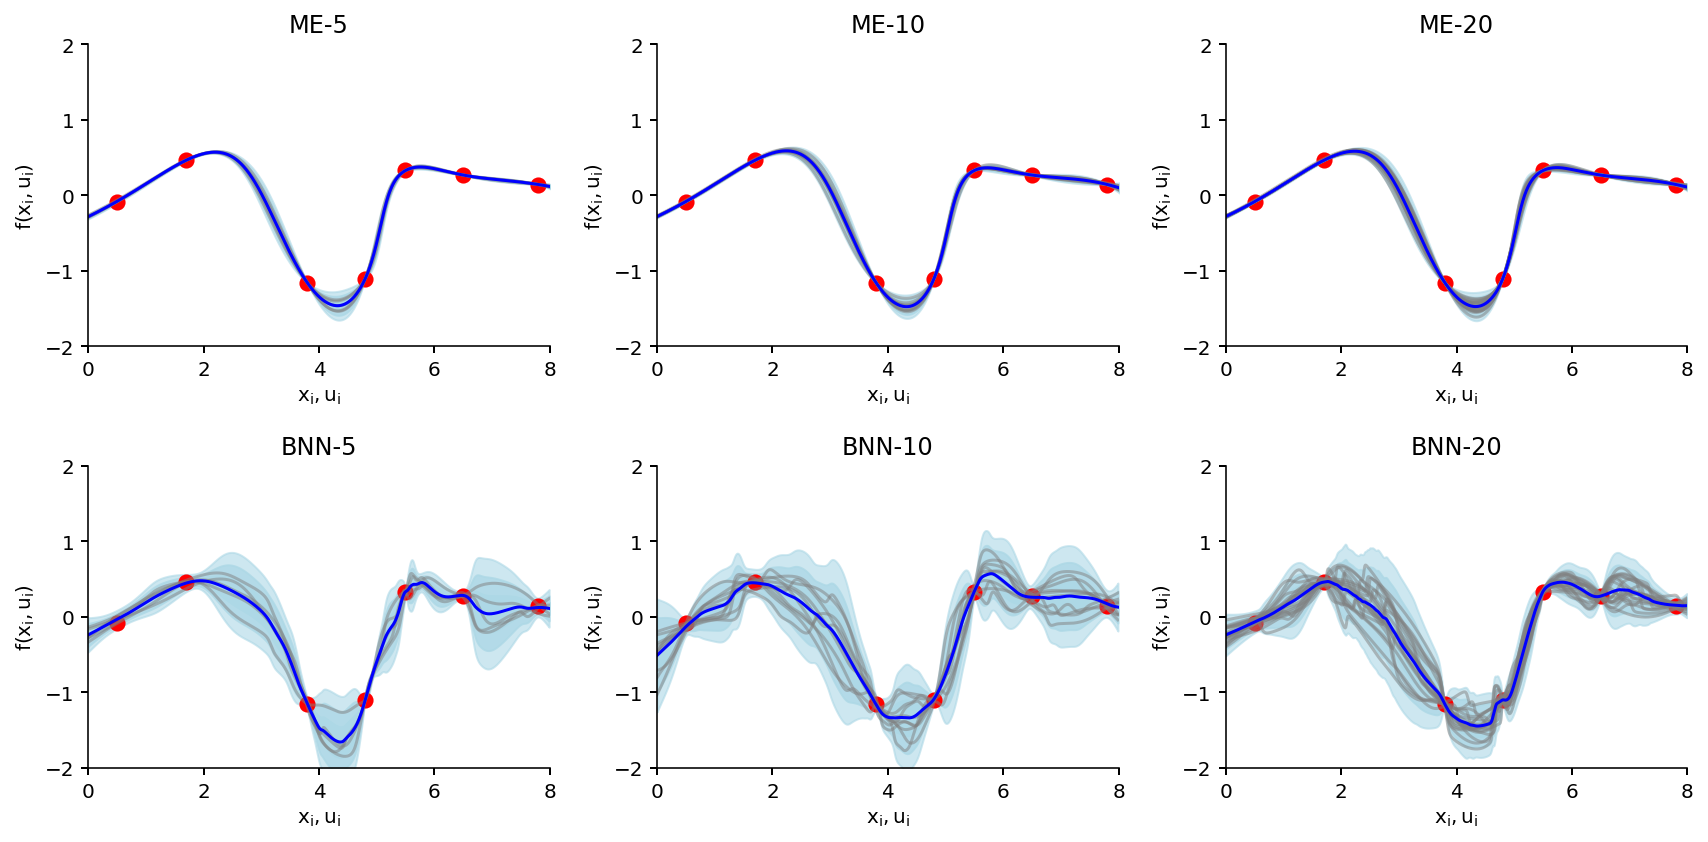

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12,6))

xlims = (-0., 8.)
ylims = (-2., 2.0)

for i in range(len(me)):
    x_validate, y_validate, y_preds = pickle.load(open(me[i], "rb"))
    plot_lineplot(ax[0][i], x_validate, y_validate, y_preds, xlims, ylims)

for i in range(len(bnn)):
    x_validate, y_validate, y_preds = pickle.load(open(bnn[i], "rb"))
    plot_lineplot(ax[1][i], x_validate, y_validate, y_preds, xlims, ylims)

titles = ['ME-5', 'ME-10', 'ME-20', 'BNN-5', 'BNN-10', 'BNN-20']
xlabel = '$x_i, u_i$'
ylabel = '$f(x_i, u_i)$'
xticks = x_validate
xticklabels = range(1,6)

for i, axes in enumerate(ax.flat):
    # Customize y ticks on a per-axes basis
    yticks = np.linspace(axes.get_ylim()[0], axes.get_ylim()[1], 5)
    yticklabels = yticks
    stylize_axes(axes, titles[i], xlabel, ylabel, xticks, yticks, xticklabels, yticklabels)
    
fig.tight_layout()

In [9]:
fig.savefig('1D.png', dpi=300, bbox_inches='tight', transparent=False)